In [ ]:
import kagglehub
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
# Load dataset
path = kagglehub.dataset_download("rahulsah06/gooogle-stock-price")
dataset_path = f"{path}/Google_Stock_Price_Train.csv"  # Update if needed based on the exact file name
df = pd.read_csv(dataset_path, dtype=str)

In [ ]:
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    df[col] = df[col].str.replace(',', '').astype(float)


# Extract features (Open, High, Low, Close, Volume)
features = df[['Open', 'High', 'Low', 'Close', 'Volume']].values

In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
# Inspect the data types of the scaled data
print(scaled_data.shape)
print(scaled_data[:10])

(1258, 5)
[[0.08581368 0.09640129 0.09044931 0.23757287 0.29525831]
 [0.09701243 0.09834351 0.09823458 0.24151427 0.22993592]
 [0.09433366 0.09251685 0.09408623 0.22878051 0.26361233]
 [0.09156187 0.08881917 0.08800576 0.21641884 0.21617942]
 [0.07984225 0.07671765 0.06106986 0.1785483  0.46779736]
 [0.0643277  0.06444805 0.05697833 0.17947163 0.35306768]
 [0.0585423  0.06033951 0.06095621 0.18335791 0.19262715]
 [0.06568569 0.063589   0.06603273 0.18841558 0.15044053]
 [0.06109085 0.05806114 0.06089938 0.18202114 0.18517821]
 [0.06639259 0.06274861 0.0652561  0.18695478 0.15317982]]


In [ ]:

# Split data into training, validation, and testing sets
train_size = int(len(scaled_data) * 0.7)
val_size = int(len(scaled_data) * 0.2)
train_data = scaled_data[:train_size]
val_data = scaled_data[train_size:train_size + val_size]
test_data = scaled_data[train_size + val_size:]

# Create sequences for training, validation, and testing
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 3])  # Predicting the 'Close' price
    return np.array(X), np.array(y)

seq_length = 30
X_train, y_train = create_sequences(train_data, seq_length)
X_val, y_val = create_sequences(val_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)



In [ ]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(seq_length, 5)))
model.add(Dropout(0.3))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=1))

optimizer = Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 0.1441 - val_loss: 0.0037
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 0.0160 - val_loss: 0.0011
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0092 - val_loss: 0.0033
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0096 - val_loss: 0.0047
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0048 - val_loss: 0.0065
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0049 - val_loss: 0.0012
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - loss: 0.0054 - val_loss: 0.0104
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0096 - val_loss: 9.2269e-04
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0049 - val_loss: 0.0038
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0038 - val_loss: 8.3566e-04
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0038 - val_loss: 8.5692e-04
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━

In [ ]:
# Extract history
history_dict = history.history

# Save the history as a CSV file
history_df = pd.DataFrame(history_dict)
history_df.to_csv("training_history.csv", index=False)

# Alternatively, save as a plain text log file
with open("training_history.log", "w") as log_file:
    for key, values in history_dict.items():
        log_file.write(f"{key}: {values}\n")

print("Training history saved to 'training_history.csv' and 'training_history.log'.")

Training history saved to 'training_history.csv' and 'training_history.log'.


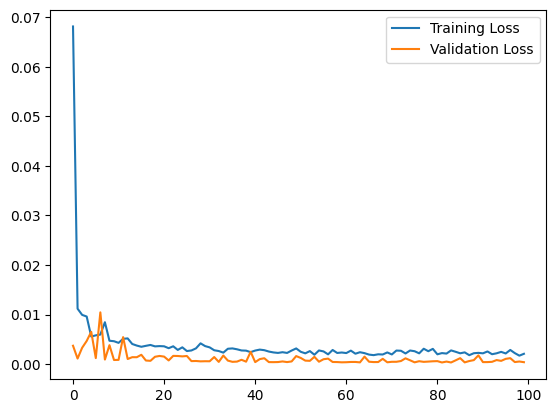

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step


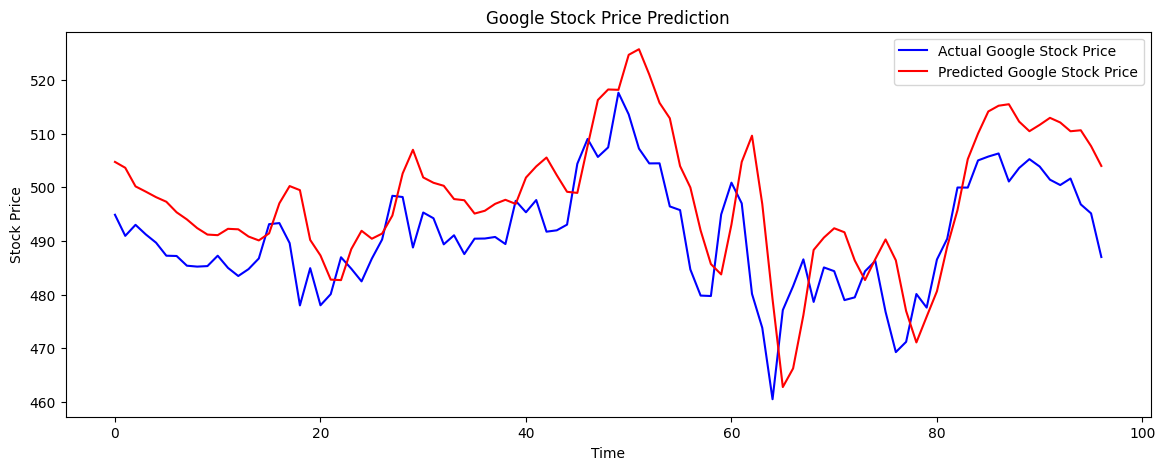

In [ ]:
# Predict and inverse transform the results
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(np.concatenate((predicted_prices, np.zeros((predicted_prices.shape[0], 4))), axis=1))[:, 0]

# Reshape actual prices for inverse transformation
actual_prices = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 4))), axis=1))[:, 0]

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(actual_prices, color='blue', label='Actual Google Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
